In [1]:
#imports

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pathlib

ImportError: cannot import name 'layers' from 'tensorflow.keras' (unknown location)

In [ ]:
class_names = ['NonDemented', 'Demented']
num_classes = len(class_names)
batch_size = 32
input_shape = (208, 176, 3)
AUTOTUNE = tf.data.experimental.AUTOTUNE

def one_hot_label(image, label):
    label = tf.one_hot(label, num_classes)
    return image, label

In [ ]:
train_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/train')
test_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/test')

train_dataset = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        class_names=class_names,
        batch_size=batch_size,
        image_size=input_shape[0:2])

test_dataset = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        labels='inferred',
        class_names=class_names,
        batch_size=batch_size,
        image_size=input_shape[0:2])

for images, labels, in train_dataset.take(1):
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.title(class_names[labels[0]])
    
train_dataset = train_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [1]:
vgg = keras.applications.VGG19(
        include_top=False,
        input_shape=input_shape,
        pooling=max)

vgg.trainable = False

model = keras.models.Sequential([
    vgg,
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model.summary()

NameError: name 'keras' is not defined

In [5]:
epochs = 30
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=["accuracy"])

history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/30
161/161 [==============================] - 47s 225ms/step - loss: 2.8502 - accuracy: 0.6399 - val_loss: 0.7995 - val_accuracy: 0.6927
Epoch 2/30
161/161 [==============================] - 32s 196ms/step - loss: 0.5557 - accuracy: 0.7766 - val_loss: 0.6056 - val_accuracy: 0.7561
Epoch 3/30
161/161 [==============================] - 32s 197ms/step - loss: 0.3352 - accuracy: 0.8617 - val_loss: 0.8338 - val_accuracy: 0.7154
Epoch 4/30
161/161 [==============================] - 32s 197ms/step - loss: 0.2668 - accuracy: 0.9082 - val_loss: 0.5254 - val_accuracy: 0.8069
Epoch 5/30
161/161 [==============================] - 32s 197ms/step - loss: 0.1773 - accuracy: 0.9483 - val_loss: 0.7227 - val_accuracy: 0.8022
Epoch 6/30
161/161 [==============================] - 32s 198ms/step - loss: 0.1616 - accuracy: 0.9572 - val_loss: 1.4627 - val_accuracy: 0.7091
Epoch 7/30
161/161 [==============================] - 32s 198ms/step - loss: 0.2210 - accuracy: 0.9611 - val_loss: 0.9123 - val_ac

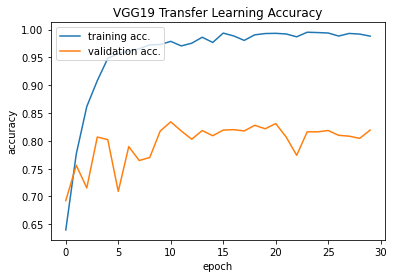

In [6]:
plt.title('VGG19 Transfer Learning Accuracy')

plt.plot(history.history['accuracy'], label = "training acc.")
plt.plot(history.history['val_accuracy'], label = "validation acc.")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training acc.', 'validation acc.'], loc='upper left')

plt.savefig("../Project/Result/VGG19_MODEL_ACCURACY")
plt.show()
